In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [156]:
voo_ticker_daily = pd.read_csv('/home/frog/Documents/VOO_ticker/VOO_daily.csv')
voo_ticker_weekly = pd.read_csv('/home/frog/Documents/VOO_ticker/VOO_weekly.csv')

voo_ticker_daily['Date'] = pd.to_datetime(voo_ticker_daily['Date'], format = '%Y-%m-%d')
voo_ticker_weekly['Date'] = pd.to_datetime(voo_ticker_weekly['Date'], format = '%Y-%m-%d')

In [157]:
k = voo_ticker_daily['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

d = voo_ticker_daily['Close'].ewm(span = 26, adjust=False, min_periods=26).mean()

macd = k - d

macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

macd_h = macd - macd_s

voo_ticker_daily['daily_macd'] = voo_ticker_daily.index.map(macd)
voo_ticker_daily['daily_macd_s'] = voo_ticker_daily.index.map(macd_s)
voo_ticker_daily['daily_macd_h'] = voo_ticker_daily.index.map(macd_h)

In [158]:
k = voo_ticker_weekly['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

d = voo_ticker_weekly['Close'].ewm(span = 26, adjust=False, min_periods=26).mean()

macd = k - d

macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

macd_h = macd - macd_s

voo_ticker_weekly['weekly_macd'] = voo_ticker_weekly.index.map(macd)
voo_ticker_weekly['weekly_macd_s'] = voo_ticker_weekly.index.map(macd_s)
voo_ticker_weekly['weekly_macd_h'] = voo_ticker_weekly.index.map(macd_h)

In [159]:
for i, row in voo_ticker_daily.iterrows():
    voo_ticker_daily['week_number'] = voo_ticker_daily['Date'].dt.strftime('%Y-%V')

for i, row in voo_ticker_weekly.iterrows():
    voo_ticker_weekly['week_number'] = voo_ticker_weekly['Date'].dt.strftime('%Y-%V')

In [160]:
voo_ticker_daily = voo_ticker_daily.merge(voo_ticker_weekly[['week_number', 'weekly_macd', 'weekly_macd_s', 'weekly_macd_h']], on='week_number', how='left')

voo_ticker_daily['Date_shifted'] = voo_ticker_daily.Date.shift()

In [161]:
check_macd = voo_ticker_daily[(voo_ticker_daily['weekly_macd_h'] > 0) & (voo_ticker_daily['weekly_macd'] > 0) ]

check_macd.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_macd,daily_macd_s,daily_macd_h,week_number,weekly_macd,weekly_macd_s,weekly_macd_h,Date_shifted
332,2012-01-03,116.900002,117.459999,116.599998,116.599998,95.417542,163250,0.810668,0.564618,0.246049,2012-01,0.243928,-0.573977,0.817906,2011-12-30
334,2012-01-04,116.440002,116.919998,115.959999,116.800003,95.581207,448450,0.919904,0.635675,0.284228,2012-01,0.243928,-0.573977,0.817906,2012-01-03
336,2012-01-05,116.279999,117.300003,115.680000,117.180000,95.892181,253500,1.025317,0.713604,0.311714,2012-01,0.243928,-0.573977,0.817906,2012-01-04
338,2012-01-06,117.300003,117.300003,116.480003,116.940002,95.695786,166900,1.077077,0.786298,0.290779,2012-01,0.243928,-0.573977,0.817906,2012-01-05
340,2012-01-09,117.139999,117.239998,116.540001,117.120003,95.843086,177000,1.119714,0.852982,0.266732,2012-02,0.571398,-0.344902,0.916300,2012-01-06
341,2012-01-10,118.360001,118.540001,117.980003,118.120003,96.661423,261200,1.220131,0.926411,0.293719,2012-02,0.571398,-0.344902,0.916300,2012-01-09
342,2012-01-11,117.779999,118.339996,117.559998,118.239998,96.759613,203800,1.294473,1.000024,0.294449,2012-02,0.571398,-0.344902,0.916300,2012-01-10
343,2012-01-12,118.519997,118.639999,117.580002,118.500000,96.972366,202250,1.358707,1.071760,0.286946,2012-02,0.571398,-0.344902,0.916300,2012-01-11
344,2012-01-13,117.699997,118.000000,116.820000,118.000000,96.563210,147200,1.353663,1.128141,0.225522,2012-02,0.571398,-0.344902,0.916300,2012-01-12
345,2012-01-17,118.980003,119.180000,118.059998,118.320000,96.825073,324250,1.359811,1.174475,0.185337,2012-03,1.003331,-0.075256,1.078586,2012-01-13


In [171]:
group = 0
long_start_price = [check_macd.iloc[0]['Open']]
long_end_price = []
long_start_date = [check_macd.iloc[0]['Date']]
long_end_date = []

for i, row in check_macd.iterrows():
    if np.busday_count(row['Date_shifted'].date(), row['Date'].date()) > 1:
        group += 1
        long_start_price.append(row['Open'])
        long_end_price.append(prev_row['Close'])
        long_start_date.append(row['Date'])
        long_end_date.append(prev_row['Date'])
    check_macd.loc[i, 'group'] = group
    prev_row = row

check_macd.head(-15)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_macd,daily_macd_s,daily_macd_h,week_number,weekly_macd,weekly_macd_s,weekly_macd_h,Date_shifted,group
332,2012-01-03,116.900002,117.459999,116.599998,116.599998,95.417542,163250,0.810668,0.564618,0.246049,2012-01,0.243928,-0.573977,0.817906,2011-12-30,1.0
334,2012-01-04,116.440002,116.919998,115.959999,116.800003,95.581207,448450,0.919904,0.635675,0.284228,2012-01,0.243928,-0.573977,0.817906,2012-01-03,1.0
336,2012-01-05,116.279999,117.300003,115.680000,117.180000,95.892181,253500,1.025317,0.713604,0.311714,2012-01,0.243928,-0.573977,0.817906,2012-01-04,1.0
338,2012-01-06,117.300003,117.300003,116.480003,116.940002,95.695786,166900,1.077077,0.786298,0.290779,2012-01,0.243928,-0.573977,0.817906,2012-01-05,1.0
340,2012-01-09,117.139999,117.239998,116.540001,117.120003,95.843086,177000,1.119714,0.852982,0.266732,2012-02,0.571398,-0.344902,0.916300,2012-01-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,2021-09-03,415.579987,417.059998,415.160004,416.570007,408.822296,3740000,3.591727,3.245299,0.346428,2021-35,14.338316,14.211818,0.126497,2021-09-02,50.0
2816,2021-11-01,423.190002,423.570007,421.279999,423.049988,416.543396,3937300,4.565469,3.092411,1.473057,2021-44,11.266969,11.235959,0.031010,2021-10-29,50.0
2817,2021-11-02,423.149994,424.959991,423.010010,424.690002,418.158203,2989200,4.853332,3.444596,1.408737,2021-44,11.266969,11.235959,0.031010,2021-11-01,50.0
2818,2021-11-03,424.140015,427.660004,423.690002,427.250000,420.678833,3562900,5.227774,3.801231,1.426543,2021-44,11.266969,11.235959,0.031010,2021-11-02,50.0


In [163]:
budget_macd = 1000

price_gap_macd = [a - b for (a,b) in zip(long_end_price, long_start_price)]

for i in range(len(long_end_price)):
    buy_quantity = budget / long_start_price[i]
    budget_macd = buy_quantity * long_end_price[i]



price_gap_buy_and_hold =  voo_ticker_daily.iloc[-1]['Close'] - voo_ticker_daily.iloc[0]['Open']

buy_quantity_buy_and_hold = 1000 / voo_ticker_daily.iloc[0]['Open']
budget_buy_and_hold = buy_quantity_buy_and_hold * voo_ticker_daily.iloc[-1]['Close']

print(budget_macd, budget_buy_and_hold)

3957.871094567536 3387.4145463414634


In [173]:
print(long_start_price, long_end_price,long_start_date, long_end_date)

[116.900002, 116.900002, 118.980003, 125.099998, 126.300003, 129.139999, 132.940002, 135.860001, 139.539993, 143.399994, 153.139999, 166.100006, 167.949997, 168.529999, 175.089996, 181.380005, 184.300003, 190.300003, 191.059998, 192.070007, 192.080002, 193.160004, 191.729996, 200.690002, 203.080002, 207.479996, 206.679993, 207.789993, 216.320007, 221.559998, 239.119995, 245.660004, 246.149994, 256.790009, 250.070007, 266.350006, 226.179993, 265.559998, 273.140015, 289.25, 295.559998, 304.079987, 309.23999, 290.670013, 309.350006, 334.290009, 341.73999, 345.019989, 347.799988, 362.149994, 370.890015, 425.190002] [422.140015, 118.0, 124.760002, 127.879997, 129.220001, 130.380005, 135.880005, 139.320007, 143.279999, 151.320007, 165.940002, 167.649994, 169.149994, 168.210007, 181.729996, 181.279999, 190.440002, 190.529999, 188.399994, 191.960007, 192.770004, 192.600006, 200.369995, 202.690002, 207.190002, 205.309998, 208.460007, 215.839996, 216.350006, 238.619995, 247.009995, 245.289993, 2

TypeError: descriptor 'date' for 'datetime.datetime' objects doesn't apply to a 'int' object

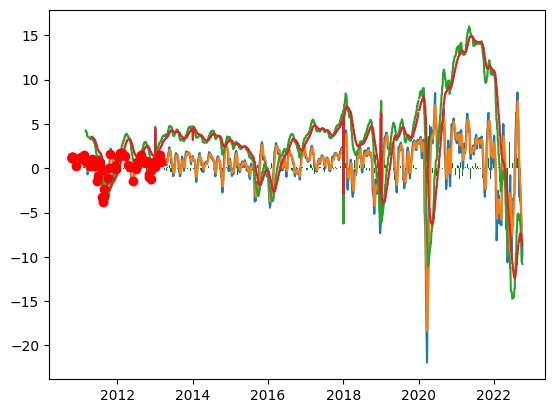

In [164]:
fig, ax = plt.subplots()

ax.plot(voo_ticker_daily.Date, voo_ticker_daily.daily_macd)
ax.plot(voo_ticker_daily.Date, voo_ticker_daily.daily_macd_s)
ax.bar(voo_ticker_daily.Date, voo_ticker_daily.daily_macd_h, color='green')

ax.plot(voo_ticker_daily.Date, voo_ticker_daily.weekly_macd)
ax.plot(voo_ticker_daily.Date, voo_ticker_daily.weekly_macd_s)

idx = np.argwhere(np.diff(np.sign(macd-macd_s))).flatten()
ax.plot(voo_ticker_daily.Date[idx], voo_ticker_daily.daily_macd[idx], 'ro')

ax.set_xlim([datetime.date(2015, 10, 4), datetime.date(2022, 10, 4)])

plt.show()